In [1]:
# from paddleocr import PaddleOCR,draw_ocr

In [2]:
# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `fr`, `german`, `korean`, `japan`
# to switch the language model in order.
# ocr = PaddleOCR(use_angle_cls=True, lang='en') # need to run only once to download and load model into memory
# img_path = '../../EAST/test-images/ctu-hkd.png'

In [3]:
# result = ocr.ocr(img_path, cls=True)
# for idx in range(len(result)):
#     res = result[idx]
#     for line in res:
#         print(line)

In [4]:
import sys
import os
# setting path
sys.path.append('../')
import csv

from pydicom import dcmread

from utils.dataloaders import MIDIEvalDataLoader
from utils.display import display_dicom
from dcm_anonymizers.utils import list_all_files
from dcm_anonymizers.img_anonymizers import DCMImageAnonymizer
from dcm_anonymizers.phi_detectors import DcmRobustPHIDetector

from pathlib import Path

In [5]:
detector = DcmRobustPHIDetector()
img_anonymizer = DCMImageAnonymizer(phi_detector=detector)

In [6]:
root_data_dir = '/home/r079a/Desktop/de-identification/dataset'

loader = MIDIEvalDataLoader(
    rawimagespath=Path(root_data_dir, 'images/manifest-1617826555824'),
    deidimagespath=Path(root_data_dir, 'images-2/manifest-1617826161202'),
    uidsmappath=Path(root_data_dir, 'Pseudo-PHI-DICOM-Dataset-uid_crosswalk.csv'),
)

In [7]:
(rawdcm, metadata), (deiddcm, deiddcm_metadata) = loader.get_raw_n_deid_patient(5, include_metadata=True)

In [8]:
rootdir = '/home/r079a/Desktop/de-identification/'
raw_img_path = Path(rootdir, 'dataset/images/manifest-1617826555824', metadata['File Location'])
deid_img_path = Path(rootdir, 'dataset/images-2/manifest-1617826161202', deiddcm_metadata['File Location'])
output_path = Path(rootdir, 'dicom-output')

In [9]:
first_dcm_name = os.listdir(raw_img_path)[0]
first_dcm_name

'1-1.dcm'

In [10]:
input_file = Path(raw_img_path, first_dcm_name)
deid_file = Path(deid_img_path, first_dcm_name)
output_file = Path(output_path, first_dcm_name)

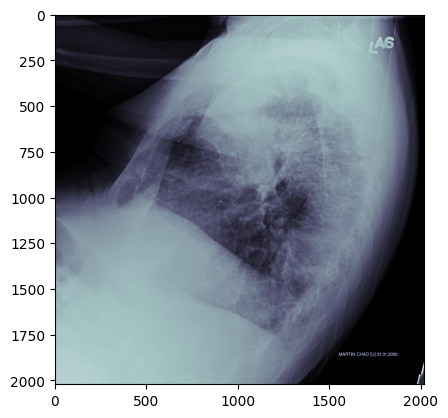

In [11]:
display_dicom(rawdcm[0])

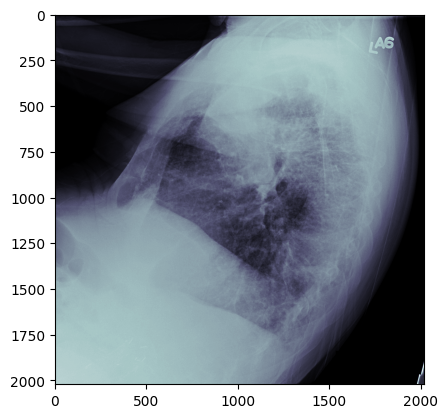

In [12]:
display_dicom(deiddcm[0])

In [13]:
img_anonymizer.anonymize_dicom_file(
    dcm_file=input_file,
    out_file=output_file
)

In [14]:
with open(output_file, 'rb') as infile:
    deidentfied_dcm = dcmread(output_file)

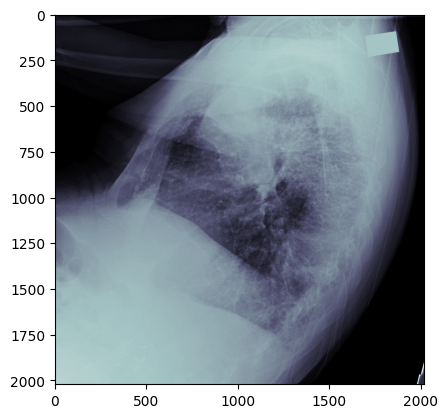

In [15]:
display_dicom(deidentfied_dcm)

In [16]:
def evaluate_anonymization(input_file, output_file):
    with open(output_file, 'rb') as outfile:
        output_dcm = dcmread(outfile)
    with open(input_file, 'rb') as outfile:
        input_dcm = dcmread(outfile)

    deidentified_note, _, _ = img_anonymizer.extract_texts_as_note(output_dcm.pixel_array)
    deidentified_texts = deidentified_note.split('\n')
    raw_note, _, _ = img_anonymizer.extract_texts_as_note(input_dcm.pixel_array)
    raw_texts = raw_note.split('\n')

    print(raw_note)
    print(deidentified_note)

    diff = abs(len(deidentified_texts) - len(raw_texts))
    return diff

In [17]:
evaluate_anonymization(deid_file, output_file)

LA6




1